In [1]:
from cs231n.classifiers.conv_net import *

In [2]:
# As usual, a bit of setup

import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.cnn import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from cs231n.layers import *
from cs231n.fast_layers import *
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [3]:
nn.Linear?

In [4]:
data = get_CIFAR10_data()
for k, v in data.iteritems():
  print '%s: ' % k, v.shape


X_val:  (1000, 3, 32, 32)
X_train:  (49000, 3, 32, 32)
X_test:  (1000, 3, 32, 32)
y_val:  (1000,)
y_train:  (49000,)
y_test:  (1000,)


In [5]:
X = data['X_train']
y=  data['y_train']
qbatch_size=64

In [15]:
import torch.optim as optim
import torch.nn.functional as F
class ThreeLayerTorchNet(nn.Module):
    def __init__(self, num_filters=32, filter_size=7,
                 input_dim=(3, 32, 32), hidden_dim=100, num_classes=10):
        super(ThreeLayerTorchNet, self).__init__()
        # input_dim  = (49000, 3, 32, 32)
        pool_height = 2
        C, H, W = input_dim
        self.conv1 = nn.Conv2d(C, num_filters, filter_size, stride=1, padding=3)
        # self.max_pool= nn.MaxPool2d(pool_height)
        self.output_dim = (32 * 32 / pool_height * 32 / pool_height)
        self.affine1 = nn.Linear(self.output_dim, hidden_dim)
        self.affine2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = F.max_pool2d(x, 2)
        x = x.view(-1, self.output_dim)
        x = F.relu(self.affine1(x))
        x = self.affine2(x)
        return x
    
    def funcy_scorer(model, X, y):
        probas = model.forward(Variable(torch.FloatTensor(X)))
        y = Variable(torch.LongTensor(y))
        probas, indices = torch.max(probas.data, 1)
        return y.data.eq(indices).sum() / float(y.size(0))


def train(epoch, X, y, batch_size=64):
    raise NotImplementedError


In [6]:

#for iteration in range(int(X.shape[0]/batch_size)):
indices = np.random.choice(X.shape[0], batch_size); indices.shape
xbatch, ybatch = X[indices], y[indices]

NameError: name 'batch_size' is not defined

In [7]:
#model.affine1

In [8]:
#x1 = model.conv1(xt).data
x2= F.max_pool2d(model.conv1(xt), 2)
x3 = x2.view(-1, model.output_dim)
x4 = F.relu(model.affine1(x3))
out = model.affine2(x4)

NameError: name 'model' is not defined

In [9]:
loss = F.nll_loss(out, yt)

NameError: name 'out' is not defined

In [10]:
out.data.shape

NameError: name 'out' is not defined

In [11]:
from tqdm import tqdm
import torch

In [13]:
batch_size =64

In [19]:
# Xbatch = np.array_split(X, int(X/batch_size))
# ybatch = np.array_split(y, int(X/batch_size))
model = ThreeLayerTorchNet()
train_scores = []
val_scores = []
optimizer = optim.Adam(model.parameters())
for step in tqdm(range(1000)):
    offset = (step * batch_size) % (y.shape[0] - batch_size)
    xbatch = X[offset:(offset + batch_size)]
    ybatch = y[offset:(offset + batch_size)]
    xt= Variable(torch.FloatTensor(xbatch))
    yt = Variable(torch.LongTensor(ybatch))
    optimizer.zero_grad()
    #print xt.data.shape
    output = model(xt)
    loss = F.nll_loss(F.log_softmax(output), yt)
    loss.backward()
    optimizer.step()
    if step % 50 == 0:
        train_scores.append(model.funcy_scorer(X,y))
        val_scores.append(model.funcy_scorer(data['X_val'], data['y_val']))
        
    
        


  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

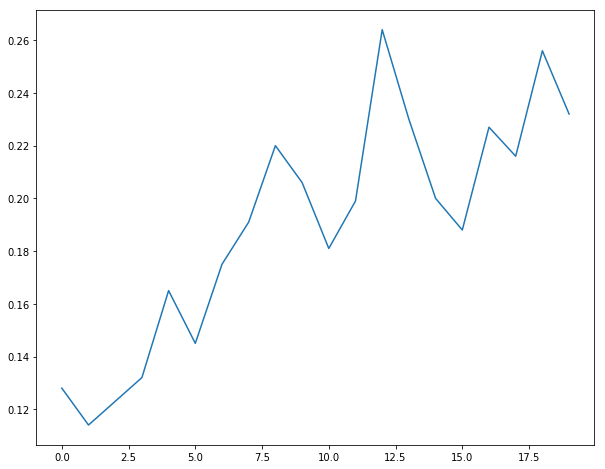

In [18]:
plt.plot(val_scores)

In [ ]:
plt.plotT()

In [ ]:
yhat = model.forward(Variable(torch.FloatTensor(X[:10])))
y = Variable(torch.LongTensor(y[:10]))

In [ ]:
score(model,)

In [ ]:
probas, indices = torch.max(yhat.data, 1)

In [ ]:
%%time
acc = score(model, data['X_val'], data['y_val'])

In [ ]:
acc